<a href="https://colab.research.google.com/github/Akshat16012001/ProdigyInfotech/blob/main/Task04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))
#/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv
#/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [22]:
#Load DataSet

cols=['TweetID', 'Topic', 'Target', 'Text']

#train = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv', names = cols)
train = pd.read_csv('/content/twitter_training.csv', names = cols)

#valid = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv', names = cols)
valid = pd.read_csv('/content/twitter_validation.csv', names = cols)

train.head()

,TweetID,Topic,Target,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [14]:
valid.head()

,TweetID,Topic,Target,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [16]:
dataset = pd.concat([train, valid], ignore_index = False)
dataset.head()

,TweetID,Topic,Target,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [17]:
dataset.describe(include = 'object')  # Describe() but for categorical/textual data

,Topic,Target,Text
count,75682,75682,74996
unique,32,4,69974
top,TomClancysRainbowSix,Negative,
freq,2435,22808,172


In [18]:
dataset['Topic'].value_counts()

Topic
TomClancysRainbowSix                 2435
LeagueOfLegends                      2431
MaddenNFL                            2429
Microsoft                            2428
CallOfDuty                           2425
Verizon                              2414
ApexLegends                          2412
Facebook                             2403
CallOfDutyBlackopsColdWar            2403
WorldOfCraft                         2394
Dota2                                2391
FIFA                                 2378
NBA2K                                2373
Battlefield                          2372
TomClancysGhostRecon                 2368
johnson&johnson                      2367
Overwatch                            2366
Xbox(Xseries)                        2360
Amazon                               2350
PlayStation5(PS5)                    2343
GrandTheftAuto(GTA)                  2339
CS-GO                                2336
Cyberpunk2077                        2334
Nvidia                      

<Axes: xlabel='Topic'>

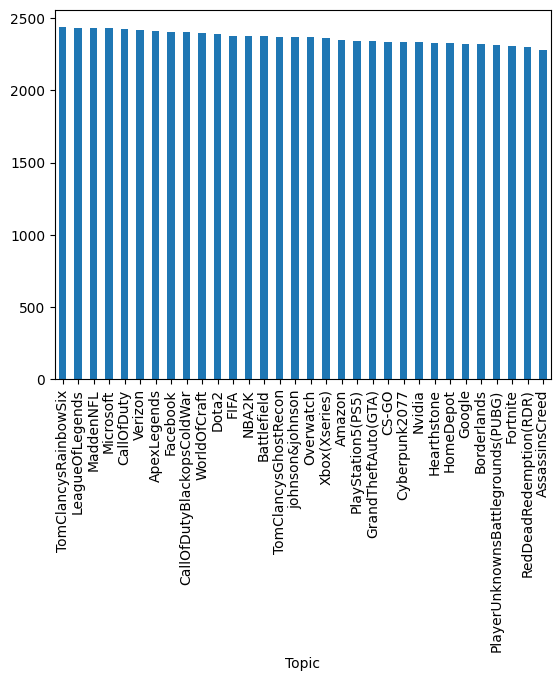

In [19]:
dataset['Topic'].value_counts().plot(kind = 'bar')

In [20]:
#handle Null and duplicate values

dataset.isna().sum()

TweetID      0
Topic        0
Target       0
Text       686
dtype: int64

In [21]:
dataset.duplicated().sum()

3217

In [23]:
dataset.dropna(inplace=True)
dataset.drop_duplicates(inplace=True)
dataset.isnull().sum()
dataset.duplicated().sum()

0

<Axes: xlabel='Target', ylabel='Topic'>

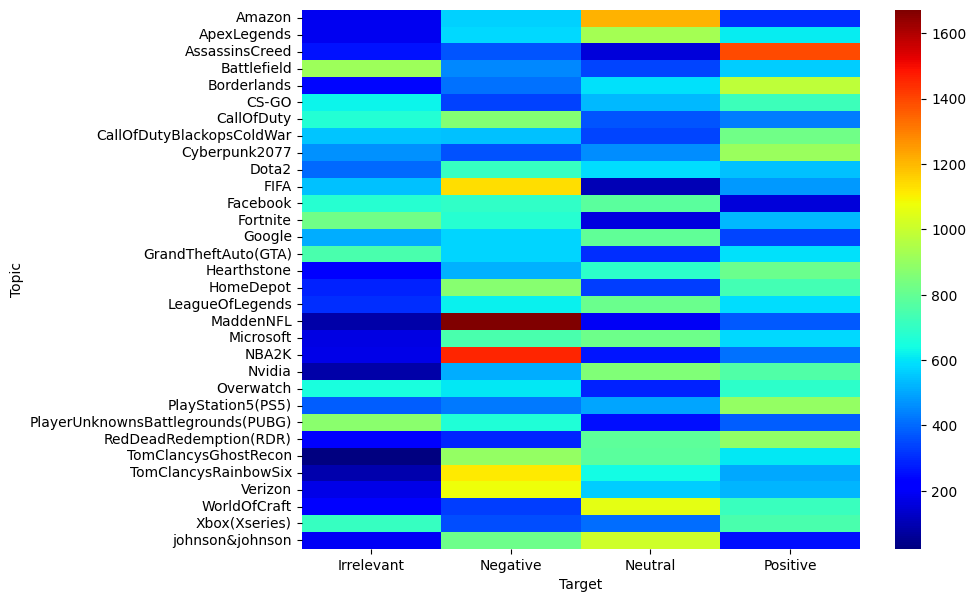

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 7))
crosstab = pd.crosstab(index=dataset['Topic'], columns=dataset['Target'])
sns.heatmap(crosstab, cmap = 'jet')

In [25]:
crosstab.head()

Target,Irrelevant,Negative,Neutral,Positive
Topic,,,,
Amazon,188,566,1210,306
ApexLegends,188,577,927,613
AssassinsCreed,257,366,155,1393
Battlefield,912,449,345,563
Borderlands,239,415,590,978


In [26]:
dataset['Topic'].values

array(['Borderlands', 'Borderlands', 'Borderlands', ..., 'CallOfDuty',
       'GrandTheftAuto(GTA)', 'CS-GO'], dtype=object)

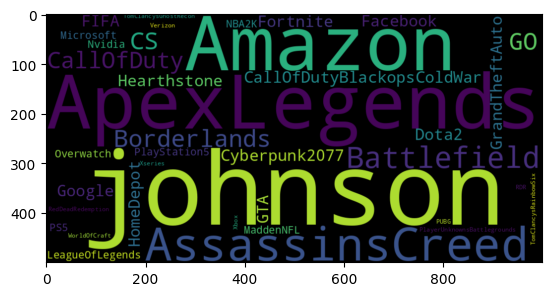

In [27]:
#Visualization

from wordcloud import WordCloud

# Note that topics are the index of crosstab DF

topic_list = ' '.join(crosstab.index)

# topic_list = dataset['Topic'].values.tolist()

wc = WordCloud(width=1000, height=500).generate(topic_list)

plt.imshow(wc, interpolation='bilinear')

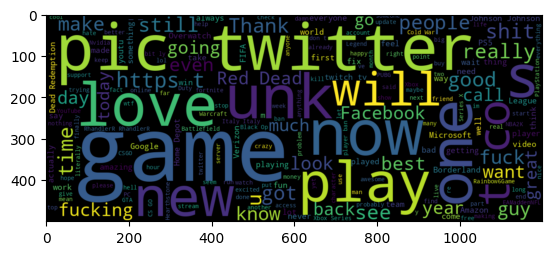

In [28]:
corpus = ' '.join(dataset['Text'])

wc2 = WordCloud(width=1200, height=500).generate(corpus)

plt.imshow(wc2, interpolation='bilinear')

In [30]:
#Cleaning and Modifying

import re

In [31]:
#Convert Text part to string

text = dataset['Text']
text.head()

0    im getting on borderlands and i will murder yo...
1    I am coming to the borders and I will kill you...
2    im getting on borderlands and i will kill you ...
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
Name: Text, dtype: object

In [32]:
dataset['Text'] = dataset['Text'].astype(str) # Modify the Text col values to str only

In [33]:
l = []
text = dataset['Text']

for t in text:
    if type(t) not in l:
        l.append(type(t))
print(l) # Checks the type of Text col

[<class 'str'>]


In [41]:
#Tokenization and Pre Processing

!pip install nltk
import nltk
nltk.download('punkt') # Download the 'punkt' resource
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [42]:
text[0], len(text), type(word_tokenize(text[0]))

('im getting on borderlands and i will murder you all ,', 72139, list)

In [43]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [44]:
type(text[0])

str

In [45]:
from nltk.tokenize import word_tokenize

modified_text = []

rows = len(text)

for ithText in dataset['Text']:

    ithText = ithText.lower()  # Make text lowercase
    ithText = re.sub(r'[^\w\s]', '', ithText) # Remove punctuations and commas
    ithText = re.sub(r'\d+', '', ithText)


    tokens = word_tokenize(ithText)  # Extract tokens of each word
    words = set(stopwords.words('english'))
    doc = [word for word in tokens if word not in words]
    finalText = ' '.join(doc)
    modified_text.append(finalText)  # ith doc contents are tokenized and stored back

print(modified_text[1:3])

['coming borders kill', 'im getting borderlands kill']


In [46]:
dataset.drop('Text', axis =1 , inplace = True)
dataset.head()

,TweetID,Topic,Target
0,2401,Borderlands,Positive
1,2401,Borderlands,Positive
2,2401,Borderlands,Positive
3,2401,Borderlands,Positive
4,2401,Borderlands,Positive


In [47]:
dataset['Text'] = modified_text
dataset.head()

,TweetID,Topic,Target,Text
0,2401,Borderlands,Positive,im getting borderlands murder
1,2401,Borderlands,Positive,coming borders kill
2,2401,Borderlands,Positive,im getting borderlands kill
3,2401,Borderlands,Positive,im coming borderlands murder
4,2401,Borderlands,Positive,im getting borderlands murder


In [48]:
#Building Model

from sklearn.model_selection import train_test_split

X = dataset['Text']
y = dataset['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)


y_pred = rf_classifier.predict(X_test_tfidf)


accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9017188799556418


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.96      0.83      0.89      2514
    Negative       0.93      0.92      0.92      4364
     Neutral       0.91      0.89      0.90      3594
    Positive       0.84      0.94      0.89      3956

    accuracy                           0.90     14428
   macro avg       0.91      0.89      0.90     14428
weighted avg       0.91      0.90      0.90     14428

